In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecommerce_customer_data_custom_ratios.csv')

In [6]:
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,08-09-2020 09:38,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,05-03-2022 12:56,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,23-05-2022 18:18,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,12-11-2020 13:13,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,27-11-2020 17:55,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,10-08-2023 13:39,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,55,Male,1
249996,48835,23-11-2021 01:30,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,42,Female,1
249997,21019,02-07-2020 14:04,Home,17,5,2466,Cash,41,0.0,Tina Craig,41,Male,0
249998,49234,30-12-2020 02:02,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,34,Female,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [8]:
df.shape

(250000, 13)

In [9]:
df.isna().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47596
Customer Name,0


In [10]:
df.isnull()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,False,False,False,False,False,False,False,False,False,False,False,False,False
249996,False,False,False,False,False,False,False,False,False,False,False,False,False
249997,False,False,False,False,False,False,False,False,False,False,False,False,False
249998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.describe()


,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [15]:
df.max()

,0
Customer ID,50000
Purchase Date,31-12-2022 23:56
Product Category,Home
Product Price,500
Quantity,5
Total Purchase Amount,5350
Payment Method,PayPal
Customer Age,70
Returns,1.0
Customer Name,Zoe Lucero


In [16]:
df.min()

,0
Customer ID,1
Purchase Date,01-01-2020 00:15
Product Category,Books
Product Price,10
Quantity,1
Total Purchase Amount,100
Payment Method,Cash
Customer Age,18
Returns,0.0
Customer Name,Aaron Acosta


In [17]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,08-09-2020 09:38,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,05-03-2022 12:56,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,23-05-2022 18:18,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,12-11-2020 13:13,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,27-11-2020 17:55,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [18]:
df.tail()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
249995,33308,10-08-2023 13:39,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,55,Male,1
249996,48835,23-11-2021 01:30,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,42,Female,1
249997,21019,02-07-2020 14:04,Home,17,5,2466,Cash,41,0.0,Tina Craig,41,Male,0
249998,49234,30-12-2020 02:02,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,34,Female,1
249999,16971,13-03-2021 16:28,Electronics,425,4,2370,Cash,36,1.0,Justin Lawson,36,Female,1


In [22]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [28]:
print(df.dtypes)


Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object


In [30]:
np.where

<function where at 0x7a2fe7773eb0>

In [40]:
import pandas as pd
#Instead of pd.df, use pd.DataFrame to create a DataFrame
df=pd.DataFrame({'age':[37],'prodectcategory':['books']}) #'books' should be a string
print("Df:")
display(df)

# Get column labels
result = df.columns

# Print the result
print("\n Name of Columns of Pandas DataFrame")
print(result)

Df:


,age,prodectcategory
0,37,books



 Name of Columns of Pandas DataFrame
Index(['age', 'prodectcategory'], dtype='object')


##1) What are the trends in total purchase amount over time (based on Purchase Date)? Are there any seasonal patterns?


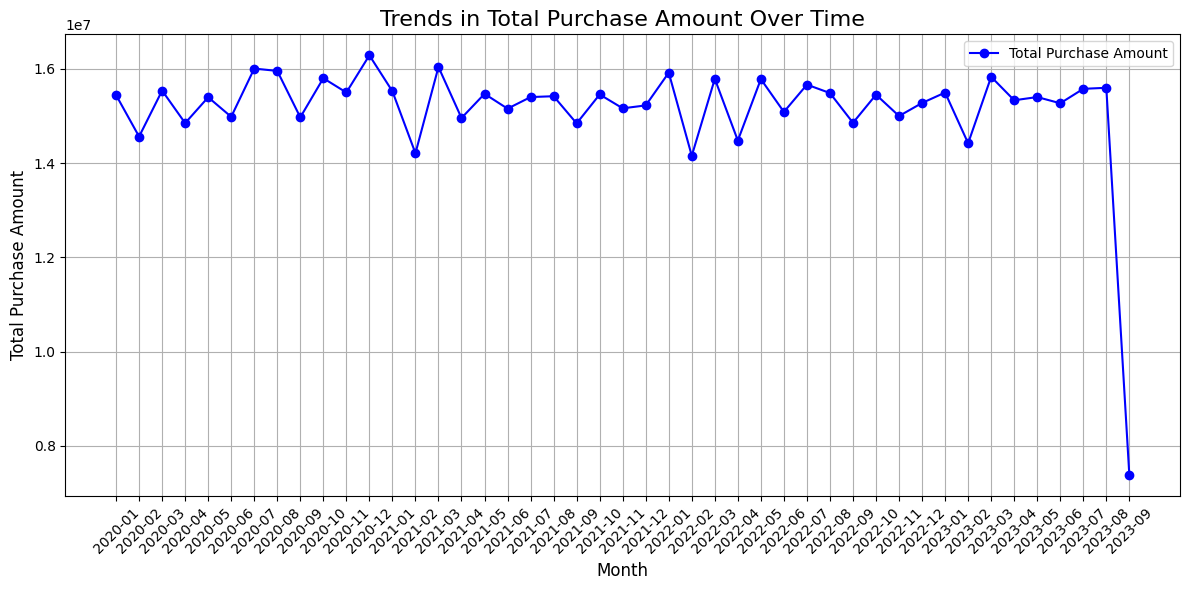

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'Purchase Date' to datetime format
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], format='%d-%m-%Y %H:%M')

# Aggregate by month
data['Month'] = data['Purchase Date'].dt.to_period('M')
monthly_trend = data.groupby('Month')['Total Purchase Amount'].sum().reset_index()

# Plot the trend
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_trend['Month'].astype(str), monthly_trend['Total Purchase Amount'], marker='o', color='b', label='Total Purchase Amount')

ax.set_title('Trends in Total Purchase Amount Over Time', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Purchase Amount', fontsize=12)
ax.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##2) Which product categories generate the highest revenue and which are the most popular based on quantity purchased?


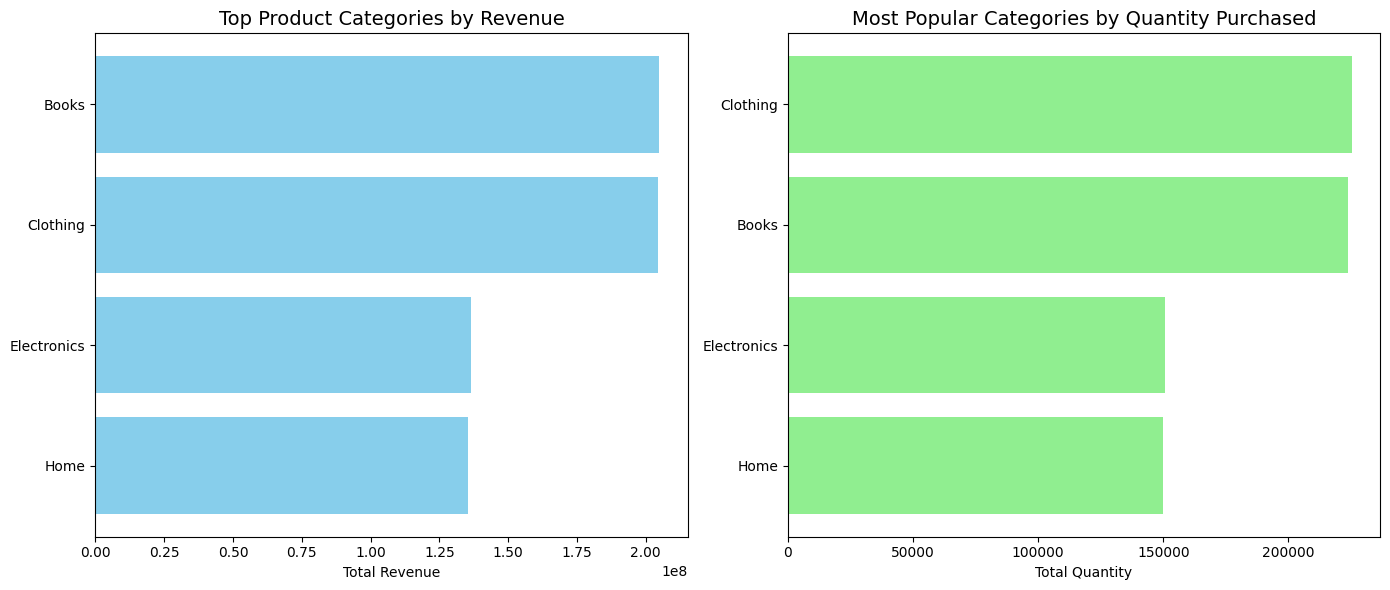

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Top product categories by revenue
revenue_by_category = data.groupby('Product Category')['Total Purchase Amount'].sum().reset_index().sort_values('Total Purchase Amount', ascending=False)

# Most popular categories by quantity purchased
quantity_by_category = data.groupby('Product Category')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top categories by revenue
axes[0].barh(revenue_by_category['Product Category'], revenue_by_category['Total Purchase Amount'], color='skyblue')
axes[0].set_title('Top Product Categories by Revenue', fontsize=14)
axes[0].set_xlabel('Total Revenue')
axes[0].invert_yaxis()

# Top categories by quantity purchased
axes[1].barh(quantity_by_category['Product Category'], quantity_by_category['Quantity'], color='lightgreen')
axes[1].set_title('Most Popular Categories by Quantity Purchased', fontsize=14)
axes[1].set_xlabel('Total Quantity')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


##3) What are the most popular payment methods, and how do they relate to the total purchase amount or frequency of purchases?


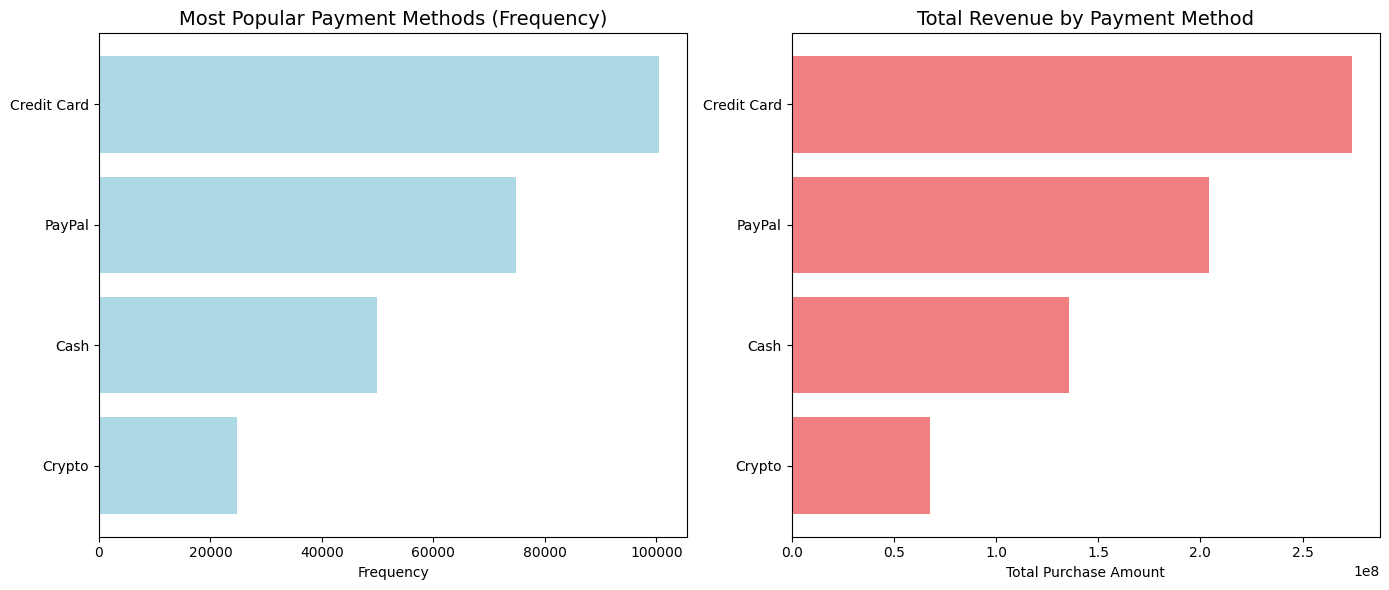

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Payment method analysis
payment_frequency = data['Payment Method'].value_counts().reset_index()
payment_frequency.columns = ['Payment Method', 'Frequency']

payment_revenue = data.groupby('Payment Method')['Total Purchase Amount'].sum().reset_index().sort_values('Total Purchase Amount', ascending=False)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Payment method by frequency
axes[0].barh(payment_frequency['Payment Method'], payment_frequency['Frequency'], color='lightblue')
axes[0].set_title('Most Popular Payment Methods (Frequency)', fontsize=14)
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()

# Payment method by total revenue
axes[1].barh(payment_revenue['Payment Method'], payment_revenue['Total Purchase Amount'], color='lightcoral')
axes[1].set_title('Total Revenue by Payment Method', fontsize=14)
axes[1].set_xlabel('Total Purchase Amount')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

##4) Who are the top customers by total purchase amount or frequency, based on Customer ID and Customer Name?



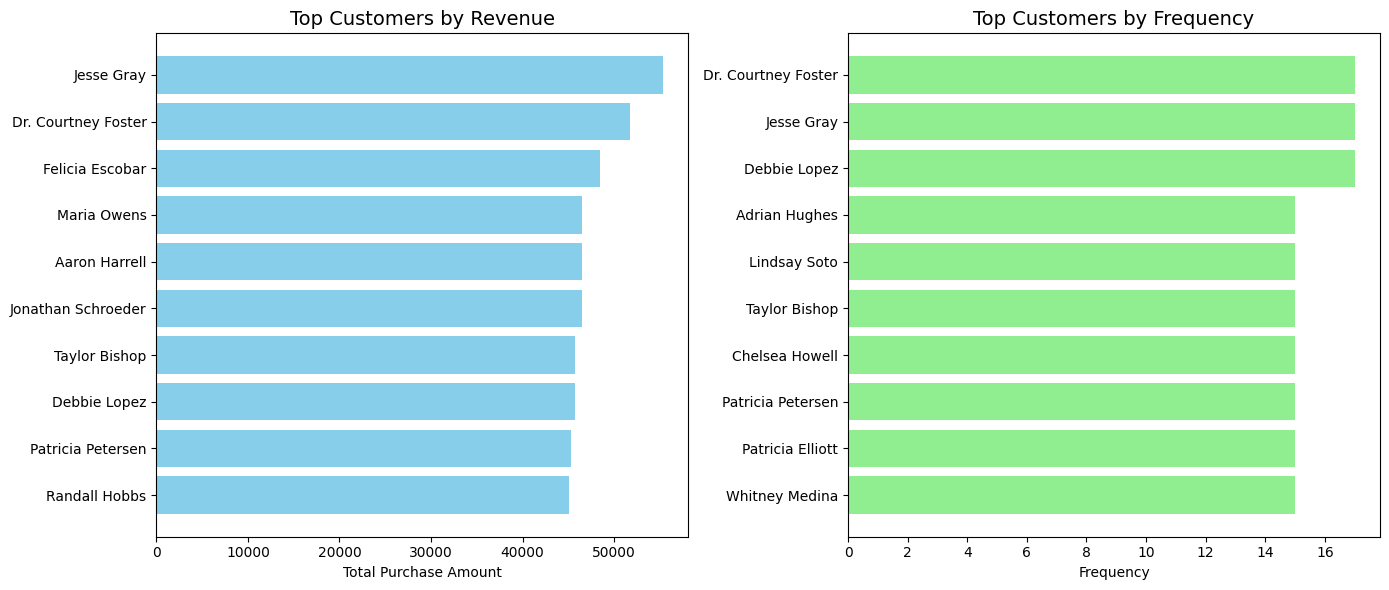

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Top customers by total purchase amount
top_customers_revenue = data.groupby(['Customer ID', 'Customer Name'])['Total Purchase Amount'].sum().reset_index()
top_customers_revenue = top_customers_revenue.sort_values('Total Purchase Amount', ascending=False).head(10)

# Top customers by frequency of purchases
top_customers_frequency = data['Customer ID'].value_counts().reset_index()
top_customers_frequency.columns = ['Customer ID', 'Frequency']
top_customers_frequency = top_customers_frequency.merge(data[['Customer ID', 'Customer Name']].drop_duplicates(), on='Customer ID')
top_customers_frequency = top_customers_frequency.sort_values('Frequency', ascending=False).head(10)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top customers by revenue
axes[0].barh(top_customers_revenue['Customer Name'], top_customers_revenue['Total Purchase Amount'], color='skyblue')
axes[0].set_title('Top Customers by Revenue', fontsize=14)
axes[0].set_xlabel('Total Purchase Amount')
axes[0].invert_yaxis()

# Top customers by frequency
axes[1].barh(top_customers_frequency['Customer Name'], top_customers_frequency['Frequency'], color='lightgreen')
axes[1].set_title('Top Customers by Frequency', fontsize=14)
axes[1].set_xlabel('Frequency')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()
